Data is collected at location Nes, Ameland.
The data is from water hight and water temperature.

The research question states:
How does the independent variable water temperature influence the dependent variable of water hight?

In [876]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, time

In [877]:
Hight = pd.read_csv("C:\\Users\\Pin\\Desktop\\DataSets\\NVT_Hm0_NES.csv",sep = ";", header = 0)
Temp = pd.read_csv("C:\\Users\\Pin\\Desktop\\DataSets\\NVT_T_NES.csv", sep = ";", header = 0)

In [878]:
def Cleanup(DataFrame):
    """
    Removes columns without any values
    Drops columns with no meaningfull values
    """
    DataFrame = DataFrame.dropna(how = "all", axis = "columns")
    DataFrame = DataFrame.drop(columns = {"Referentievlak","Bemonsteringshoogte"})
    return DataFrame

In [879]:
def Translate(DataFrame):
    """
    Translates all dutch to english
    Replaces oC with °C
    """
    degree_sign = u"\N{DEGREE SIGN}"
    Rename_dict = {"Datum":"Date",
                   "Tijd":"Time",
                   "Locatie":"Location",
                   "Waarde":"Value",
                   "Eenheid":"Unit",
                   "Windrichting":"Winddirection",
                   "Windrichting eenheid":"Wind direction unit"}
    DataFrame = DataFrame.rename(columns = Rename_dict)
    DataFrame = DataFrame.replace(["Significante golfhoogte in het spectrale domein Oppervlaktewater golffrequentie tussen 30 en 500 mHz in cm", "Temperatuur Oppervlaktewater oC", "graden", "oC"],
                                   ["Significant wave height in the spectral domain Surface water wave frequency between 30 and 500 mHz in cm","Temperature surface water " + degree_sign + "C", "Degrees", degree_sign + "C"])
    return DataFrame

In [880]:
def CombineAndDrop(DataFrame):
    """
    Renames columns to add their unit
    Removes columns that are not used, like the seperate unit column
    """
    Unused = {"Parameter", "Location", "Unit", "Wind direction unit"}
    DataFrame = DataFrame.replace("Significant wave height in the spectral domain Surface water wave frequency between 30 and 500 mHz in cm","Wave hight in cm")
    Rename_dict = {"Value": DataFrame["Parameter"].iloc[0],
                   "Winddirection": "Winddirection in " + DataFrame["Wind direction unit"].iloc[0]}
    DataFrame = DataFrame.rename(columns = Rename_dict)
    DataFrame = DataFrame.drop(columns = Unused)
    
    return DataFrame

In [881]:
def AddTime(DataFrame):
    """
    Adds the time column to the date column
    """
    DataFrame["DateTime"] = DataFrame["Date"] + " " + DataFrame["Time"]
    DataFrame = DataFrame.drop(columns = {"Date", "Time"})
    return DataFrame

In [882]:
def Preproccessing(DataFrame):
    DataFrame = Cleanup(DataFrame)
    DataFrame = Translate(DataFrame)
    DataFrame = CombineAndDrop(DataFrame)
    DataFrame = AddTime(DataFrame)

    return DataFrame

In [883]:
Hight = Preproccessing(Hight)
Temp = Preproccessing(Temp)

<AxesSubplot:xlabel='DateTime'>

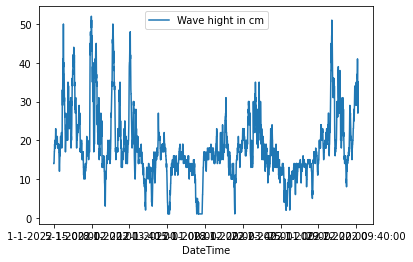

In [890]:
Hight.plot(x = "DateTime", y = "Wave hight in cm")

In [887]:
Temp

,Temperature surface water °C,Winddirection in Degrees,DateTime
0,"5,6","183,3",1-1-2022 15:00:00
1,"5,7","182,2",1-1-2022 15:10:00
2,"5,6","179,7",1-1-2022 15:20:00
3,"5,6","181,7",1-1-2022 15:30:00
4,"5,6","180,6",1-1-2022 15:40:00
...,...,...,...
4026,"5,4","231,0",29-1-2022 14:00:00
4027,"5,4","227,9",29-1-2022 14:10:00
4028,"5,4","227,1",29-1-2022 14:20:00
4029,"5,4","229,8",29-1-2022 14:30:00
